In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'
import sys
import pickle
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_process.trajectories_post_process import ComputeTrajectorySuccessProbability
from src.general.io_handling import pickle_in_data
import socket
from src.visualization.analyze_trajectories import dict_to_array, compute_n_ave
from src.visualization.visualize_fitness import InjectionKlDistance

In [2]:
path = "/nfs/pool002/users/rganti/Optimal_Protocols_bnabs_pool002/data/raw/Trials_dr_0.02_muij_0.05_bins_15/"
boost_path = path + "optimal_boost/"
optimal_pairs = np.loadtxt(path + "optimal_pairs")

In [3]:
optimal_pairs

array([[1.5     , 0.182538],
       [1.3     , 0.176825],
       [1.2     , 0.173707],
       [1.      , 0.16681 ],
       [0.8     , 0.15874 ]])

In [4]:
optimal_pairs[1, 0]

1.3

In [5]:
optimal_pairs[1][1]

0.176825

In [6]:
low_nave = compute_n_ave(boost_path + "Sigma_{0}/".format(optimal_pairs[1, 0]))

In [7]:
low_kl = InjectionKlDistance(low_nave/np.sum(low_nave), sigma=optimal_pairs[1, 1], 
                             num_odes=len(low_nave) + 1)

In [8]:
low_kl.compute_kl_distance()

72.1248898635088

In [17]:
low_kl.f

array([0.        , 0.        , 0.        , 0.        , 0.00000008,
       0.00061132, 0.12625249, 0.74627221, 0.12625249, 0.00061132,
       0.00000008, 0.        , 0.        , 0.        , 0.        ])

In [18]:
optimal_kl.f

array([0.        , 0.        , 0.        , 0.        , 0.00000005,
       0.00048026, 0.12030992, 0.75841954, 0.12030992, 0.00048026,
       0.00000005, 0.        , 0.        , 0.        , 0.        ])

In [19]:
high_kl.f

array([0.        , 0.        , 0.        , 0.        , 0.00000001,
       0.00026732, 0.10673813, 0.78598908, 0.10673813, 0.00026732,
       0.00000001, 0.        , 0.        , 0.        , 0.        ])

In [9]:
optimal_nave = compute_n_ave(boost_path + "Sigma_{0}/".format(optimal_pairs[2, 0]))

In [10]:
optimal_nave

array([35.813     , 14.07366667, 13.05233333, 13.062     ,  9.48233333,
        4.28366667,  1.04766667,  0.33033333,  1.059     ,  4.251     ,
        9.48766667, 13.07966667, 13.07033333, 13.82533333, 34.94866667])

In [11]:
optimal_kl = InjectionKlDistance(optimal_nave/np.sum(optimal_nave), sigma=optimal_pairs[2, 1], 
                                 num_odes=len(optimal_nave) + 1)

In [12]:
optimal_kl.compute_kl_distance()

56.459319120997534

In [13]:
high_nave = compute_n_ave(boost_path + "Sigma_{0}/".format(optimal_pairs[3, 0]))

In [14]:
high_nave

array([1.69333333, 1.314     , 2.06233333, 3.21266667, 3.49933333,
       2.31066667, 0.696     , 0.26266667, 0.893     , 2.74633333,
       4.05133333, 3.72133333, 2.49533333, 1.563     , 2.14533333])

In [15]:
high_kl = InjectionKlDistance(high_nave/np.sum(high_nave), sigma=optimal_pairs[3, 1],
                             num_odes=len(high_nave) + 1)

In [16]:
high_kl.compute_kl_distance()

34.732761658961515

In [12]:
low_n_ave = np.loadtxt(boost_path + "Sigma_{0}/Trial_0/n_ave".format(optimal_pairs[1][0], 
                                                                                     round(optimal_pairs[1][1], 2)))

In [13]:
low_n_ave

array([70.48, 16.91,  8.25,  5.69,  3.04,  0.75,  0.04,  0.  ,  0.13,
        0.33,  2.  ,  5.32,  7.46, 16.32, 63.28])

In [16]:
low_sample = pickle_in_data(boost_path + "Sigma_1.3/Trial_0/injection_2_sig_0.18/num_success_dict")

In [18]:
np.sum(low_sample.values())

475

In [3]:
low = pickle_in_data(path + "Sigma_{0}/total_num_success_dict".format(1.3))
low_array = dict_to_array(low)

optimal = pickle_in_data(path + "Sigma_{0}/total_num_success_dict".format(1.2))
optimal_array = dict_to_array(optimal)

high = pickle_in_data(path + "Sigma_{0}/total_num_success_dict".format(1.0))
high_array = dict_to_array(high)

In [4]:
total = []
for t in range(30):
    total.append(np.loadtxt(path + "Sigma_{0}/Trial_{1}/total_bnabs".format(1.2, t)))

In [5]:
np.sum(total)/30

3219.4

In [14]:
x = np.sum(low_array[1:])/30.0

In [19]:
"{:.2f}".format(np.sum(low_array[1:])/30.0)

'726.67'

Text(0.5,1,'$N_{bnAbs}$ produced by breadth state $i$ after prime')

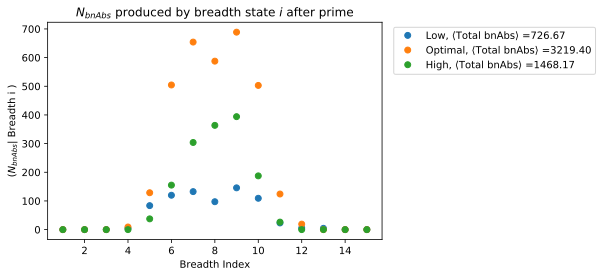

In [21]:
plt.plot(range(1, 16), low_array[1:]/30.0, color='C0', linestyle='None', marker='o',
         label="Low, $\\langle $Total bnAbs$ \\rangle$ =" + "{:.2f}".format(np.sum(low_array[1:])/30.0))
plt.plot(range(1, 16), optimal_array[1:]/30.0, color='C1', linestyle='None', marker='o',
        label="Optimal, $\\langle $Total bnAbs$ \\rangle$ =" + "{:.2f}".format(np.sum(optimal_array[1:])/30.0))
plt.plot(range(1, 16), high_array[1:]/30.0, color='C2', linestyle='None', marker='o',
        label="High, $\\langle $Total bnAbs$ \\rangle$ =" + "{:.2f}".format(np.sum(high_array[1:])/30.0))

plt.legend(bbox_to_anchor=(1.02, 1.00))
plt.ylabel("$(N_{bnAbs} | $ Breadth i $)$")
plt.xlabel("Breadth Index")
plt.title("$N_{bnAbs}$ produced by breadth state $i$ after prime")

In [12]:
sequences = pickle_in_data("/nobackup1c/users/rganti/Optimal_Protocols_bnAbs_nobackup1c/data/raw/optimal_boost/Sigma_1.2/total_num_success_dict")

In [13]:
np.sum(sequences.values())

96754

In [6]:
np.sum(sequences.values())

1234

In [2]:
path = "../../data/raw/extended_breadth_multiple_trials/Trials_dr_0.02_muij_0.05_bins_15/"

In [4]:
optimal_pairs = np.loadtxt(path + "optimal_pairs")

In [ ]:
n8 = np.loadtxt(path + "Sigma")

In [5]:
optimal_pairs

array([[1.5     , 0.60822 ],
       [1.3     , 0.176825],
       [1.2     , 0.173707],
       [1.      , 0.16681 ],
       [0.8     , 0.15874 ]])

In [6]:
boost_path = path + "optimal_boost/"
low = ComputeTrajectorySuccessProbability(sigma_1=optimal_pairs[1][0], sigma_2=optimal_pairs[1][1], 
                                          num_odes=16, path=boost_path)
# low.process_trajectories()
optimal = ComputeTrajectorySuccessProbability(sigma_1=optimal_pairs[2][0], sigma_2=optimal_pairs[2][1],
                                         num_odes=16, path=boost_path)
# optimal.process_trajectories()

hi = ComputeTrajectorySuccessProbability(sigma_1=optimal_pairs[3][0], sigma_2=optimal_pairs[3][1],
                                        num_odes=16, path=boost_path)
# hi.process_trajectories()


In [7]:
low_bnabs = low.load_dictionaries()
optimal_bnabs = optimal.load_dictionaries()
hi_bnabs = hi.load_dictionaries()

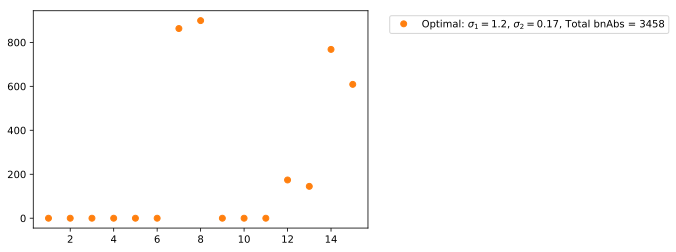

In [13]:
# plt.plot(range(1, low.num_odes), low_bnabs.values(), color='C0', linestyle='None', marker='o',
#         label="Low: $\\sigma_{1} = $" + "{0}".format(low.sigma_1) + ", $\\sigma_{2} = $" + 
#         "{:01.2f}".format(low.sigma_2) + ", Total bnAbs = {0}".format(np.sum(low_bnabs.values())))

plt.plot(range(1, optimal.num_odes), optimal_bnabs.values(), color='C1', linestyle='None', marker='o',
        label="Optimal: $\\sigma_{1} = $" + "{0}".format(optimal.sigma_1) + ", $\\sigma_{2} = $" + 
        "{:01.2f}".format(optimal.sigma_2) + ", Total bnAbs = {0}".format(np.sum(optimal_bnabs.values())))

# plt.plot(range(1, hi.num_odes), hi_bnabs.values(), color='C2', linestyle='None', marker='o',
#         label="High: $\\sigma_{1} = $" + "{0}".format(hi.sigma_1) + ", $\\sigma_{2} = $" + 
#         "{:01.2f}".format(hi.sigma_2) + ", Total bnAbs = {0}".format(np.sum(hi_bnabs.values())))

plt.legend(bbox_to_anchor=(1.05, 1.00))

In [34]:
np.sum(low_bnabs.values())

862

In [33]:
np.sum(optimal_bnabs.values(), axis=0)

3458

In [38]:
optimal_bnabs

{'N1': 0,
 'N10': 0,
 'N11': 0,
 'N12': 0,
 'N13': 0,
 'N14': 0,
 'N15': 0,
 'N2': 0,
 'N3': 0,
 'N4': 174,
 'N5': 145,
 'N6': 768,
 'N7': 609,
 'N8': 863,
 'N9': 899}

In [37]:
low_bnabs

{'N1': 0,
 'N10': 0,
 'N11': 0,
 'N12': 0,
 'N13': 0,
 'N14': 0,
 'N15': 0,
 'N2': 0,
 'N3': 0,
 'N4': 0,
 'N5': 0,
 'N6': 0,
 'N7': 282,
 'N8': 151,
 'N9': 429}

In [36]:
hi_bnabs

{'N1': 0,
 'N10': 337,
 'N11': 0,
 'N12': 0,
 'N13': 0,
 'N14': 0,
 'N15': 0,
 'N2': 0,
 'N3': 0,
 'N4': 0,
 'N5': 0,
 'N6': 0,
 'N7': 0,
 'N8': 138,
 'N9': 240}

In [ ]:
"../../data/raw/extended_breadth_multiple_trials/"

In [18]:
pickle_in = open("../../data/raw/extended_breadth_multiple_trials/Trials_dr_0.02_muij_0.05_bins_15/optimal_boost/Sigma_1.2/injection_2_sig_0.17/trajectory_0.pickle", "rb")
sequences = pickle.load(pickle_in)
pickle_in.close()

In [25]:
np.sum(sequences, axis=0)

array([3048., 2514.,   68.,    0.,    0.,    0.,    0.,    0.,    0.,
         12.,   97.,   59.,   12.,    4.,    2.,    1.,    1.,   12.])

In [66]:
np.sum(np.sum(sequences, axis=0)[11:])

200.0

In [39]:
np.sum(sequences[-1], axis=0)

array([22840.,    66.,    52.,    39.,    10.,     1.,    31.,    36.,
          31.])

In [35]:
np.sum(sequences[1], axis=0)

array([53.,  3., 20.,  3.,  0.,  0.,  0.,  7., 19.])